In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

Using TensorFlow backend.


In [2]:
Dir_M = 'dataset/Mask'
Dir_N = 'dataset/No_Mask'

images = []
labels = []
label_dict = {
    'Mask' : 0,
    'No_Mask' : 1
}

img_size = 100
for i in [Dir_M, Dir_N]:
    files = sorted(os.listdir(i))
    print(f'Number of files in {i} : {len(files)}')
    for j in files:
        img = cv2.imread(i + '/' + j)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized_gray = cv2.resize(img_gray, (img_size, img_size))
        images.append(img_resized_gray)
        labels.append(label_dict[i.split('/')[1]])

images = np.array(images)/255.0
labels = np.array(labels)

images = np.expand_dims(images, axis = -1)
categorical_labels = keras.utils.to_categorical(labels)

Number of files in dataset/Mask : 690
Number of files in dataset/No_Mask : 686


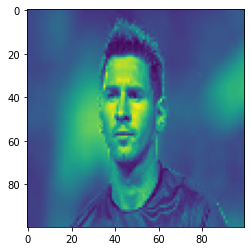

[0. 1.]


In [3]:
index = 1000
plt.imshow(images[index, :, :, 0])
plt.show()
print(categorical_labels[index])

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)      

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, categorical_labels, test_size = 0.1)

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
history = model.fit(x = X_train, y = Y_train, batch_size=64, epochs=25, validation_split=0.2, verbose=1)

Train on 990 samples, validate on 248 samples
Epoch 1/25
990/990 [==============================] - 6s 6ms/step - loss: 0.7416 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5121
Epoch 2/25
990/990 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5182 - val_loss: 0.6908 - val_accuracy: 0.4879
Epoch 3/25
990/990 [==============================] - 1s 1ms/step - loss: 0.6734 - accuracy: 0.5596 - val_loss: 0.6595 - val_accuracy: 0.6935
Epoch 4/25
990/990 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6626 - val_loss: 0.6036 - val_accuracy: 0.6895
Epoch 5/25
990/990 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7273 - val_loss: 0.5066 - val_accuracy: 0.8347
Epoch 6/25
990/990 [==============================] - 1s 1ms/step - loss: 0.4445 - accuracy: 0.7899 - val_loss: 0.4285 - val_accuracy: 0.8347
Epoch 7/25
990/990 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.8697 - 

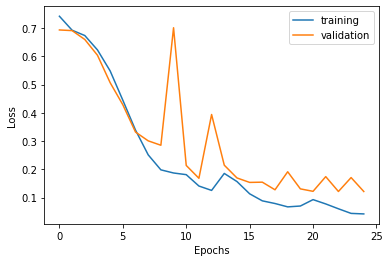

In [9]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

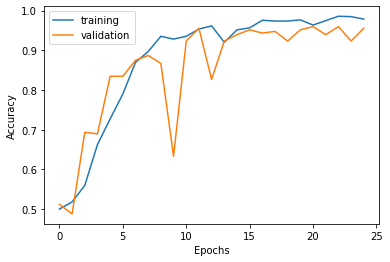

In [10]:
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = model.evaluate(x = X_test,y = Y_test)
print()
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

138/138 [==============================] - 0s 3ms/step

Loss = 0.12708040683165842
Test Accuracy = 0.9637681245803833


In [12]:
model.save('mask_detector.h5')